In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
data = pd.read_csv("Heart_Disease_Prediction.csv")
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [106]:
data.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [107]:
data["Heart Disease"] = data["Heart Disease"].map({"Presence":1, "Absence":0})
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [108]:
data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [109]:
data.corr()["Heart Disease"].sort_values(ascending=False)

Heart Disease              1.000000
Thallium                   0.525020
Number of vessels fluro    0.455336
Exercise angina            0.419303
ST depression              0.417967
Chest pain type            0.417436
Slope of ST                0.337616
Sex                        0.297721
Age                        0.212322
EKG results                0.182091
BP                         0.155383
Cholesterol                0.118021
FBS over 120              -0.016319
Max HR                    -0.418514
Name: Heart Disease, dtype: float64

In [110]:
data = data.drop("FBS over 120", axis=1)
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,2,121,1,0.2,1,1,3,0


In [111]:
data.corr()["Heart Disease"].sort_values(ascending=False)

Heart Disease              1.000000
Thallium                   0.525020
Number of vessels fluro    0.455336
Exercise angina            0.419303
ST depression              0.417967
Chest pain type            0.417436
Slope of ST                0.337616
Sex                        0.297721
Age                        0.212322
EKG results                0.182091
BP                         0.155383
Cholesterol                0.118021
Max HR                    -0.418514
Name: Heart Disease, dtype: float64

In [112]:
X = data.drop("Heart Disease", axis = 1).to_numpy()
y = data["Heart Disease"].to_numpy()

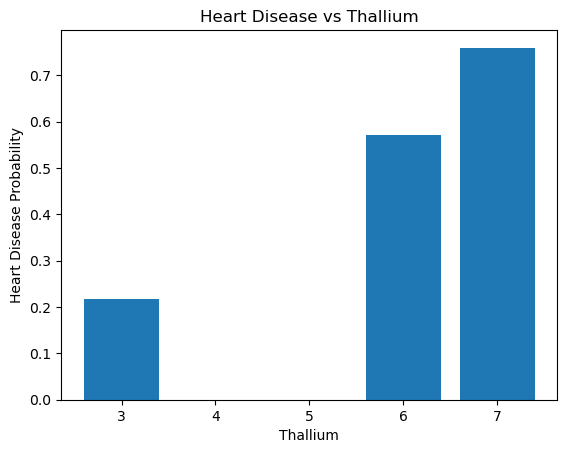

In [113]:
thallium_mean = data.groupby("Thallium")["Heart Disease"].mean()

plt.bar(thallium_mean.index, thallium_mean.values)
plt.xlabel("Thallium")
plt.ylabel("Heart Disease Probability")
plt.title("Heart Disease vs Thallium")
plt.show()


In [114]:
split_length = int(0.8*X.shape[0])
X_train, X_test = X[:split_length], X[split_length:]
y_train, y_test = y[:split_length], y[split_length:]

In [115]:
def standarize(x):
    return (x - np.mean(x,axis = 0))/np.std(x,axis=0)

In [116]:
X_train = standarize(X_train)
X_test = standarize(X_test)

In [117]:
def sigmoid(z):
    z = np.clip(z, -20, 20)
    return 1/(1+np.exp(-z))

In [118]:
def predict(x,w,b):
    z = np.dot(x,w) + b
    g = sigmoid(z)
    return g

In [119]:
def log_loss(x,w,b,y):
    m = y.shape[0]
    epsilon = 1e-15   # log(0) avoid karne ke liye
    y_pred = predict(x,w,b)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -(1/m)*np.sum(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))
    return loss

In [120]:
def gradient_descent(x,y,iter,alpha):
    m, n = x.shape
    w = np.zeros((n, 1))
    b = 0
    cost_history = []
    for i in range(iter):            
        y_pred = predict(x,w,b)
        cost = log_loss(x,w,b,y)
        cost_history.append(cost)
        dl_dw = (1/m)* np.dot(x.T,(y_pred-y))
        dl_db = (1/m)* np.sum(y_pred - y)
        w -= alpha * dl_dw
        b -= alpha * dl_db
        if(i%100 == 0):
            print(f'iteration: {i} ------------ cost: {cost}')
    return w,b,cost_history

In [121]:
iter = 3000
alpha = 0.005
y_train = y_train.reshape((-1,1))
w_final,b_final,cost_history = gradient_descent(X_train,y_train,iter,alpha)

iteration: 0 ------------ cost: 0.6931471805599453
iteration: 100 ------------ cost: 0.5627425004196475
iteration: 200 ------------ cost: 0.49374869813072547
iteration: 300 ------------ cost: 0.4531330103138614
iteration: 400 ------------ cost: 0.42695102549901714
iteration: 500 ------------ cost: 0.4088790191605722
iteration: 600 ------------ cost: 0.3957505548482008
iteration: 700 ------------ cost: 0.38583441638215915
iteration: 800 ------------ cost: 0.3781133292787845
iteration: 900 ------------ cost: 0.3719535879749275
iteration: 1000 ------------ cost: 0.36694118569792206
iteration: 1100 ------------ cost: 0.36279482759292975
iteration: 1200 ------------ cost: 0.35931703226282763
iteration: 1300 ------------ cost: 0.35636527602619605
iteration: 1400 ------------ cost: 0.353834243922745
iteration: 1500 ------------ cost: 0.35164451609668324
iteration: 1600 ------------ cost: 0.34973512985246696
iteration: 1700 ------------ cost: 0.348058555919786
iteration: 1800 ------------ cost

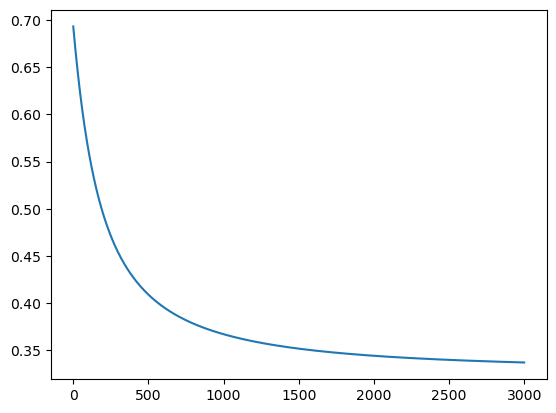

In [122]:
plt.plot(cost_history)

In [123]:
def predict_class(x, w, b, threshold):
    probs = predict(x, w, b)
    probs = probs.ravel()    
    return (probs >= threshold).astype(int)

In [124]:
y_test_probs = predict(X_test,w_final,b_final)

In [125]:

thresholds = np.linspace(0, 1, 101)

In [126]:
def precision_recall_at_threshold(y_true, y_prob, threshold):
    y_prob = y_prob.ravel()
    y_pred = (y_prob >= threshold).astype(int)

    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0

    return precision, recall


In [127]:
precisions = []
recalls = []
f1_scores = []

for t in thresholds:
    p, r = precision_recall_at_threshold(y_test, y_test_probs, t)
    precisions.append(p)
    recalls.append(r)
    f1 = (2 * p * r) / (p + r) if (p + r) != 0 else 0
    f1_scores.append(f1)


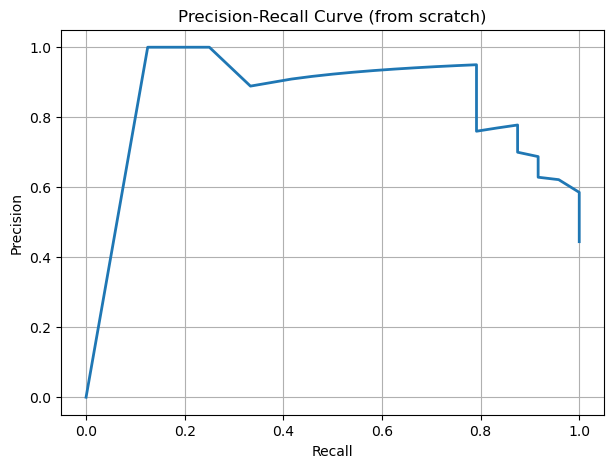

In [128]:
plt.figure(figsize=(7,5))
plt.plot(recalls, precisions, linewidth=2)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (from scratch)")
plt.grid(True)
plt.show()



In [129]:
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"Best F1-score = {best_f1:.4f}")
print(f"Best Threshold = {best_threshold:.2f}")

Best F1-score = 0.8636
Best Threshold = 0.53


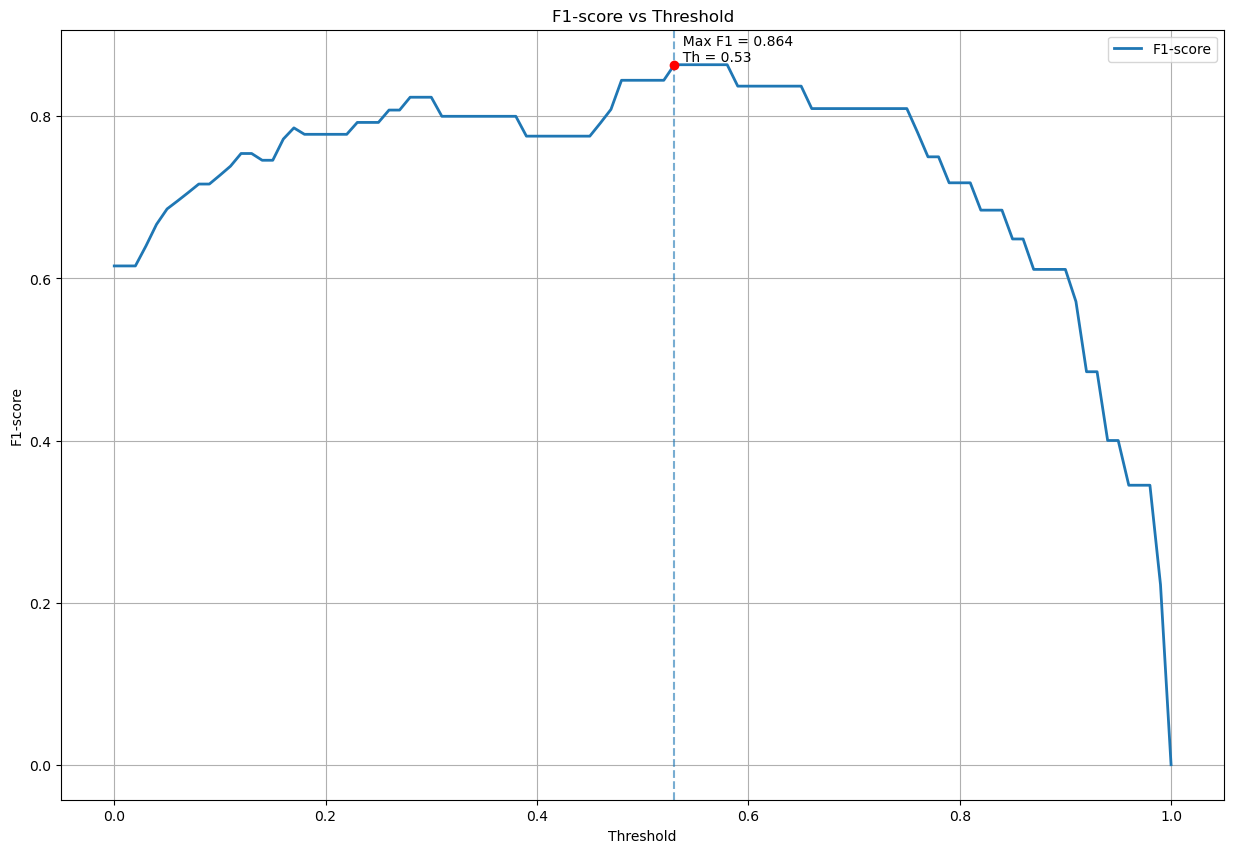

In [130]:
plt.figure(figsize=(15,10))
plt.plot(thresholds, f1_scores, label="F1-score", linewidth=2)

plt.scatter(best_threshold, best_f1, color='red', zorder=5)
plt.axvline(best_threshold, linestyle='--', alpha=0.6)

plt.text(
    best_threshold,
    best_f1,
    f"  Max F1 = {best_f1:.3f}\n  Th = {best_threshold:.2f}",
    verticalalignment='bottom'
)

plt.xlabel("Threshold")
plt.ylabel("F1-score")
plt.title("F1-score vs Threshold")
plt.legend()
plt.grid(True)
plt.show()


In [131]:
print("Mean prob (y=1):", y_test_probs[y_test == 1].mean())
print("Mean prob (y=0):", y_test_probs[y_test == 0].mean())


Mean prob (y=1): 0.7363409679648298
Mean prob (y=0): 0.19636098485859457


In [132]:
print("Weight norm:", np.linalg.norm(w_final))
print("Bias:", b_final)


Weight norm: 1.5541188231167147
Bias: -0.2509447492544487


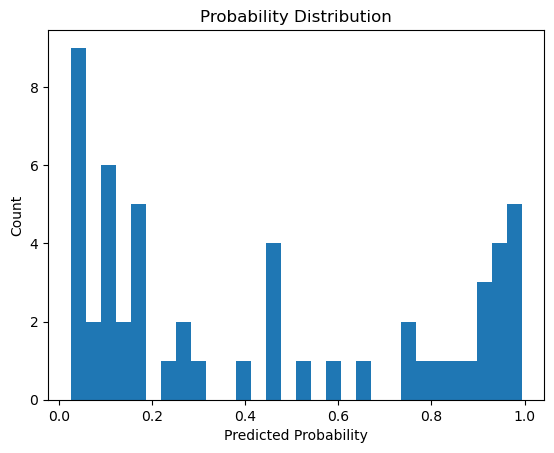

In [133]:
plt.hist(y_test_probs, bins=30)
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.title("Probability Distribution")
plt.show()


In [134]:
def accuracy(y_true, y_pred):
    y_true = np.array(y_true).ravel()
    y_pred = np.array(y_pred).ravel()
    return np.mean(y_true == y_pred)


In [135]:
y_test = y_test.reshape(-1) 

In [136]:
y_test_pred = predict_class(X_test,w_final,b_final,0.46)

In [137]:
accuracy(y_test,y_test_pred)

0.8148148148148148